# Step 1 : Data analysis

### (After reading the file README and analyse the data on my own)

**This data set consists of:**
- 100,000 ratings (1-5) from 943 users on 1682 movies. 
- Each user has rated at least 20 movies. 
- Simple demographic info for the users (age, gender, occupation, zip)


**data :**
- 100000 ratings by 943 users on 1682 items.
- Each user has rated at least 20 movies.  
- Users and items are numbered consecutively from 1.  
- The data is randomly ordered. 
- This is a tab separated list of user id | item id | rating | timestamp. 
- The time stamps are unix seconds since 1/1/1970 UTC 

In [1]:
import pandas as pd 

data = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u.data', sep='\t',names=['user_id', 'movie_id', 'rating', 'timestamp'],
encoding='latin-1')

print('Number of data :',  data.shape[0])
print('Number of users :',  data.user_id.nunique())
print('Number of movies (items) :',  data.movie_id.nunique())
print('\n********')
print('  data')
print('********')
data.head()

Number of data : 100000
Number of users : 943
Number of movies (items) : 1682

********
  data
********


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
data.isnull().sum() # Just to check if there are any missing values

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

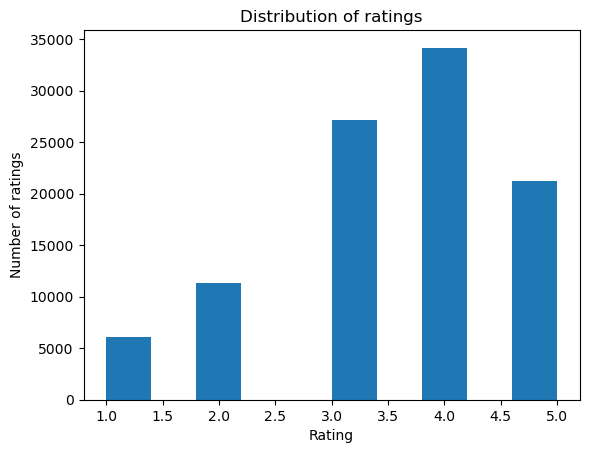

In [3]:
import matplotlib.pyplot as plt

plt.hist(data.rating)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

People generally seem to give a rating between 3 and 4

In [4]:
data.rating.describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**info :**
- The number of users, items, and ratings in the u data set.

In [5]:

info = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u.info', sep='\t',names=["Infos"],
encoding='latin-1')

print(info.shape)
print('\n********')
print('  info')
print('********')
info

(3, 1)

********
  info
********


,Infos
0,943 users
1,1682 items
2,100000 ratings


**items :**
- Information about the items (movies)
- This is a tab separated list of movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy |
Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western |
- The last 19 fields are the genres, a 1 indicates the movie is of that genre, a 0 indicates it is not
- movies can be in several genres at once.
- The movie ids are the ones used in the u.data data set.

In [6]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u.item', sep='|', names=i_cols,encoding='latin-1')

print("Number of items:",items.shape[0])
print('\n*********')
print('  items')
print('*********')
items.head()

Number of items: 1682

*********
  items
*********


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


For this dataset I'm going to clean the data to better visualize the importants columns

In [7]:
items.isnull().sum() # Just to check if there are any missing values

movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [8]:
items["video release date"].unique() # To check if there are any other values than NaN in the column 'video release date'

array([nan])

In [9]:
# Delete the columns 'video release date' and 'IMDb URL' because they are not useful

items.drop(columns=["video release date"], inplace=True)
items.drop(columns=["IMDb URL"], inplace=True)

In [10]:
items[items.isnull().any(axis=1)] # To check if there are any missing values in the dataset

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data[data.movie_id == 267].user_id.nunique() # To check how many rates the movie with id 267 has

9

We are going to keep this row because that's not really important for what's following

In [12]:
import re

# Function to remove the year from the movie title
def remove_year(title):
    return re.sub(r'\s*\(\d{4}\)', '', title)

items['movie title'] = items['movie title'].apply(remove_year)

# Function to extract the year from the movie title
def extract_year(date):
    return re.search(r'\d{4}', date).group() if pd.notnull(date) else date

items['release date'] = items['release date'].apply(extract_year)


Let's see the new dataframe items

In [13]:
items

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy,1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


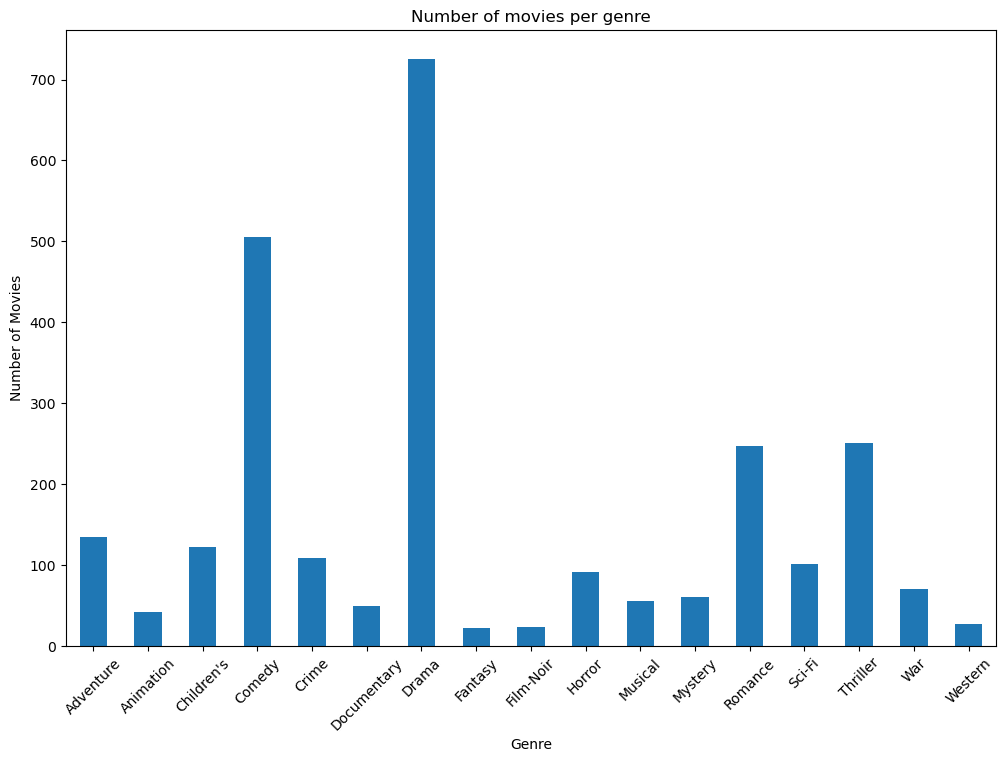

In [14]:

genre_counts = items.iloc[:, 5:].sum()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Number of movies per genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Most of theses movie are 'Drama' movies and 'Comedy' movies.

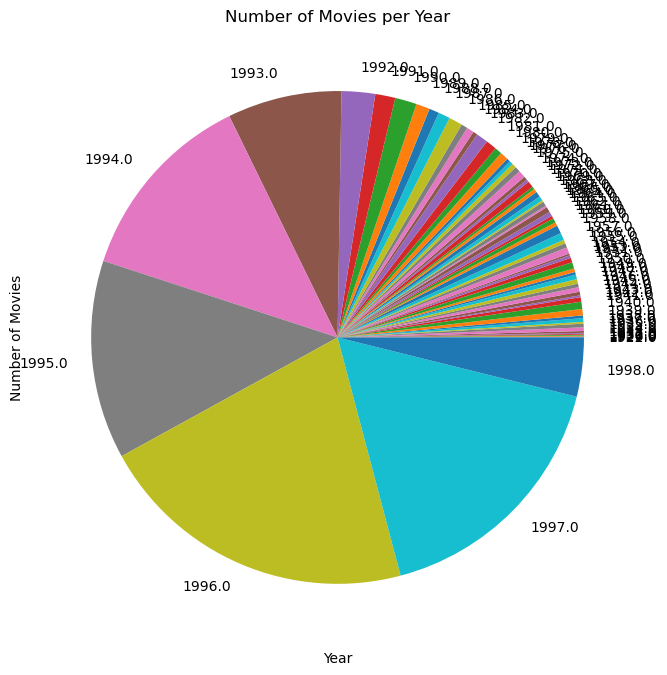

In [15]:
# Convert the release date to integer year
items['release date'] = items['release date'].astype(float)

# Count the number of movies per year
movies_per_year = items['release date'].value_counts().sort_index()

# Plot the number of movies per year
plt.figure(figsize=(12, 8))
movies_per_year.plot(kind='pie')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Here you can see which years most of the films are from.

**genre :**
- A list of the genres.

In [16]:
genre = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u.genre', sep='|',names=["Genre", "ID"],
encoding='latin-1')

genre.drop(columns=["ID"], inplace=True)

print(genre.shape)
print('\n*********')
print('  genre')
print('*********')
genre

(19, 1)

*********
  genre
*********


,Genre
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's
5,Comedy
6,Crime
7,Documentary
8,Drama
9,Fantasy


**user :**
- Demographic information about the users
- this is a tab separated list of user id | age | gender | occupation | zip code
- **The user ids are the ones used in the u.data data set.**

In [17]:

u_cols =  ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u.user', sep='|', names=u_cols,
encoding='latin-1')

print('Number of users:',  users.shape[0])
print('\n*********')
print('  users')
print('*********')
users.head()

Number of users: 943

*********
  users
*********


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [18]:
import plotly.express as px

fig_gender = px.pie(users, names ='gender')
fig_gender.show()



According to this pie chart the statistics of this study is at 71% based on male and only 29% on female.

In [19]:
fig_occupation = px.pie(users, names ='occupation')
fig_occupation.show()

According to this pie chart the major occupation of people in this study is 'student'

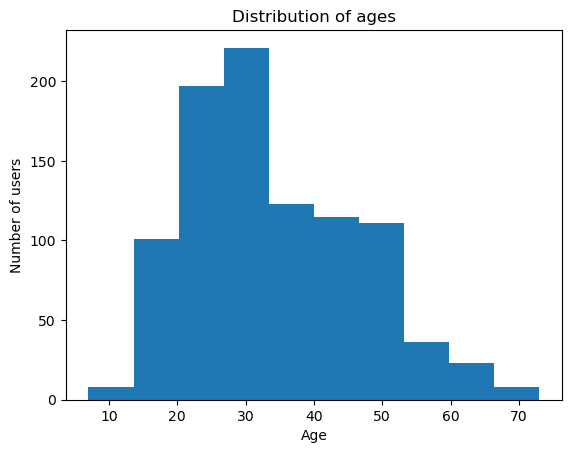

In [20]:
plt.hist(users.age)
plt.title('Distribution of ages')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

In [21]:
users.isnull().sum() # Just to check if there are any missing values

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

**occupation :**
- A list of the occupations.

In [22]:
occupation = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u.occupation', sep='|',names=["Occupation"],
encoding='latin-1')

print('\n************')
print(' occupation')
print('************')
occupation


************
 occupation
************


,Occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


**u1.base...u5.base & u1.test...u5.test :**

- The data sets u1.base and u1.test through u5.base and u5.test are 80%/20% splits of the u data into training and test data.
- Each of u1, ..., u5 have disjoint test sets



In [23]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base1 = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u1.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test1 = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/u1.test', sep='\t', names=r_cols, encoding='latin-1')



print('Number of traing rates:', ratings_base1.shape[0])

ratings_base1.head()

Number of traing rates: 80000


,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [24]:
print('Number of test rates:', ratings_test1.shape[0])
ratings_test1.head()

Number of test rates: 20000


,user_id,movie_id,rating,unix_timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


**ua.base, ua.test & ub.base, ub.test :**

- The data sets ua.base, ua.test, ub.base, and ub.test split the u data into a training set and a test set with exactly 10 ratings per user in the test set.  
- The sets ua.test and ub.test are disjoint.  

In [25]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_basea = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_testa = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')



print('Number of traing rates:', ratings_basea.shape[0])

ratings_basea.head()

Number of traing rates: 90570


,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [26]:
print('Number of test rates:', ratings_testa.shape[0])
ratings_testa.head()

Number of test rates: 9430


,user_id,movie_id,rating,unix_timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


In [27]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_baseb = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/ub.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_testb = pd.read_csv('C:/Users/guill/OneDrive/Documents/ESILV/A4/Math for DL/Exo_optionnel/archive/ml-100k/ub.test', sep='\t', names=r_cols, encoding='latin-1')



print('Number of traing rates:', ratings_baseb.shape[0])

ratings_baseb.head()

Number of traing rates: 90570


,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [28]:
print('Number of test rates:', ratings_testb.shape[0])
ratings_testb.head()

Number of test rates: 9430


,user_id,movie_id,rating,unix_timestamp
0,1,17,3,875073198
1,1,47,4,875072125
2,1,64,5,875072404
3,1,90,4,878542300
4,1,92,3,876892425


### **- Some more data analysis in general**

In [29]:
data['age'] = data['user_id'].apply(lambda x: users.loc[users['user_id'] == x, 'age'].values[0])
data.head()

,user_id,movie_id,rating,timestamp,age
0,196,242,3,881250949,49
1,186,302,3,891717742,39
2,22,377,1,878887116,25
3,244,51,2,880606923,28
4,166,346,1,886397596,47


In [30]:
data["age rating mean"] = data.groupby("age")["rating"].transform("mean")
data

,user_id,movie_id,rating,timestamp,age,age rating mean
0,196,242,3,881250949,49,3.676735
1,186,302,3,891717742,39,3.627586
2,22,377,1,878887116,25,3.577872
3,244,51,2,880606923,28,3.541862
4,166,346,1,886397596,47,3.480173
...,...,...,...,...,...,...
99995,880,476,3,880175444,13,3.470825
99996,716,204,5,879795543,36,3.504039
99997,276,1090,1,874795795,21,3.461589
99998,13,225,2,882399156,47,3.480173


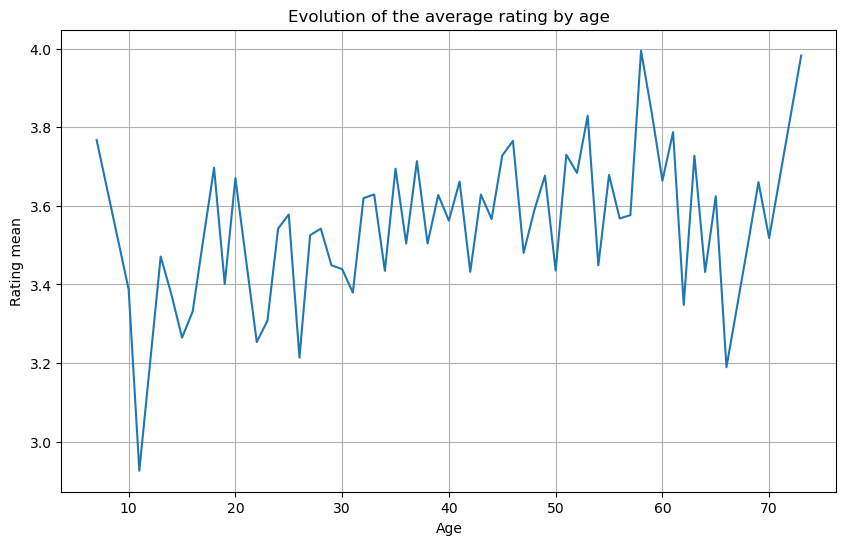

In [31]:
import matplotlib.pyplot as plt

# Calculer la moyenne des notes par âge
age_rating_mean = data.groupby('age')['age rating mean'].mean()

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(age_rating_mean.index, age_rating_mean.values)
plt.title('Evolution of the average rating by age')
plt.xlabel('Age')
plt.ylabel('Rating mean')
plt.grid(True)
plt.show()

According to this graph we can see that very young people et very old people seem to rate the films in an irrelevant way (either too high or too low).

In [32]:
# Function to get the genres of a movie
def get_genres(movie_id):
    genres = items.loc[items['movie id'] == movie_id, items.columns[4:]].values.flatten()
    genre_list = items.columns[4:][genres == 1].tolist()
    return ', '.join(genre_list)

data['genre'] = data['movie_id'].apply(get_genres)

data.head()

,user_id,movie_id,rating,timestamp,age,age rating mean,genre
0,196,242,3,881250949,49,3.676735,Comedy
1,186,302,3,891717742,39,3.627586,"Crime, Film-Noir, Mystery, Thriller"
2,22,377,1,878887116,25,3.577872,"Children's, Comedy"
3,244,51,2,880606923,28,3.541862,"Drama, Romance, War, Western"
4,166,346,1,886397596,47,3.480173,"Crime, Drama"


In [33]:

data_exploded = data.assign(genre=data['genre'].str.split(', ')).explode('genre')


data_exploded.head()

,user_id,movie_id,rating,timestamp,age,age rating mean,genre
0,196,242,3,881250949,49,3.676735,Comedy
1,186,302,3,891717742,39,3.627586,Crime
1,186,302,3,891717742,39,3.627586,Film-Noir
1,186,302,3,891717742,39,3.627586,Mystery
1,186,302,3,891717742,39,3.627586,Thriller


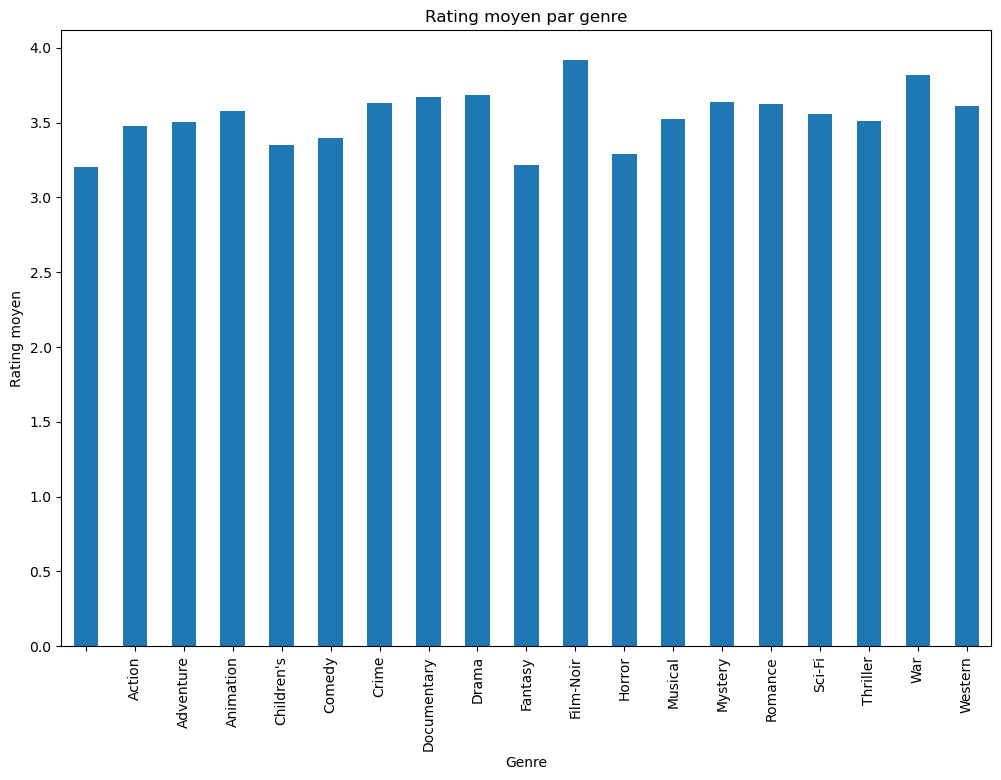

In [34]:
# Calculer la note moyenne par genre
genre_rating_mean = data_exploded.groupby('genre')['rating'].mean()

# Tracer l'histogramme
plt.figure(figsize=(12, 8))
genre_rating_mean.plot(kind='bar')
plt.title('Rating moyen par genre')
plt.xlabel('Genre')
plt.ylabel('Rating moyen')
plt.show()

According to this graph it seems to be the genre "Film-Noir" that has the better ratings but this is also related to the fact that there is much less movie 'Film-Noir' that have been rate than movie 'Action' for exemple.

You can see this with the value_counts function

In [35]:
data_exploded.value_counts('genre')

genre
Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children's      7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
                  10
dtype: int64

# Step 2 : Build the data matrix movies/users

To begin with, we have to create the matrix movies/users (movies_id in columns and users_id in index)

We have to do a separation between train and test.

This separation needs to be 80% of the datas for the train and 20% for the test. 

As we saw before, there is already some data (**u1.base...u5.base & u1.test...u5.test :**) that are 80%/20% splits of the u data into training and test data. **So let's take u1.base and u1.test to do the matrix of train and test.**

In [36]:
ratings_base1 # the u1.base data for the train

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [37]:
items_movie_ids = set(items['movie id'])

ratings_movie_ids = set(ratings_base1['movie_id'])

missing_movie_ids = items_movie_ids - ratings_movie_ids

print(missing_movie_ids)
print(len(missing_movie_ids))

{1536, 1156, 1543, 1557, 1561, 1562, 1563, 1309, 1310, 1565, 1320, 814, 1582, 1457, 1458, 1586, 830, 1343, 1348, 711, 852, 1236, 1364, 599, 1492, 857, 1493, 1498, 1373, 1505, 1520, 1533}
32


We see that in ratings_base1 there is not all the movie (there is 32 movies missing).

Let's create the matrix user_id/movie_id in order to do the SVD 

In [38]:
df_matrice_ratings_train = ratings_base1.pivot_table(index='user_id', columns='movie_id', values='rating')

# Let's add the missing movie ids to the matrix with NaN values
for col in missing_movie_ids:
    df_matrice_ratings_train[col] = pd.NA

df_matrice_ratings_train = df_matrice_ratings_train.reindex(sorted(df_matrice_ratings_train.columns), axis=1) # here to sort the columns after adding the missing movie ids

df_matrice_ratings_train

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see the pourcentage and quantity of NaN values in df_matrice_ratings_train and df_matrice_ratings_test

In [39]:
print("************ df_matrice_ratings_train ************\n")

print("Total number of NaN values in the matrix:",  df_matrice_ratings_train.isnull().sum().sum())
print("Percentage of NaN values in the matrix:",  round(df_matrice_ratings_train.isnull().sum().sum()/(df_matrice_ratings_train.size)*100,2) ,"%")

print("\nTotal numbre of non-NaN values in the matrix:", df_matrice_ratings_train.count().sum())
print("Percentage of NaN values in the matrix:",  round(df_matrice_ratings_train.count().sum()/(df_matrice_ratings_train.size)*100,2) ,"%")






************ df_matrice_ratings_train ************

Total number of NaN values in the matrix: 1506126
Percentage of NaN values in the matrix: 94.96 %

Total numbre of non-NaN values in the matrix: 80000
Percentage of NaN values in the matrix: 5.04 %


As we can see there is a lot of NaN values wich is normal because not everyone can see all the 1682 movies.

We gonna have to find a genius way to fill all this NaN values in order to have the better preddiction with de SVD.

The fact that there is a lot of NaN values per rows can't let us to only fill this NaN values with the mean or the median or something classic because there would have to much time the same rate and this would give us bad prediction resul

The idea would be to create de kind of "profil" per users with their age, gender, occupations... in order to **classify users into some kind of category** and **when a USER_1 have a NaN values on a movie we are going to search the rate for this particular movie in the other users that have the same profil that USER_1**. A python tool exist to do this : KNN Imputer

# Step 3 : Clean the data (remove the missing values)

**We are going to try differents way to fill the NaN values and then at the end we will test all this method to see wich gives us the better results**

### 1) Fill with the mean of the user 

In [40]:
df_matrice_ratings_train

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_matrice_ratings_train_filled_mean = df_matrice_ratings_train.apply(lambda row: row.fillna(row.mean()), axis=1)


In [42]:
df_matrice_ratings_train_filled_mean

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.000000,3.000000,3.000000,3.681481,4.000000,1.000000,5.000000,3.681481,...,3.681481,3.681481,3.681481,3.681481,3.681481,3.681481,3.681481,3.681481,3.681481,3.681481
2,4.000000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,2.000000,...,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000
3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
4,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,...,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143,4.357143
5,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,...,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044,2.956044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,5.000000,4.265306,...,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306,4.265306
940,3.457944,3.457944,3.457944,2.000000,3.457944,3.457944,4.000000,5.000000,3.000000,3.457944,...,3.457944,3.457944,3.457944,3.457944,3.457944,3.457944,3.457944,3.457944,3.457944,3.457944
941,5.000000,4.045455,4.045455,4.045455,4.045455,4.045455,4.000000,4.045455,4.045455,4.045455,...,4.045455,4.045455,4.045455,4.045455,4.045455,4.045455,4.045455,4.045455,4.045455,4.045455


In [43]:
print("Number of NaN values : ", df_matrice_ratings_train_filled_mean.isnull().sum().sum() )

Number of NaN values :  0


### 2) Fill with KNN Imputer

The KNN Imputer can't take in parameter a dataframe with some columns completly fill of NaN values so we have to separate the datas, do the KNN Imputer and concat the new data imputed with the columns that we droped before.

In [44]:
from sklearn.impute import KNNImputer

# Take the columns completely composed of NaN
nan_columns = df_matrice_ratings_train.columns[df_matrice_ratings_train.isna().all()].tolist()

# Drop the columns with completely NaN values
df_matrice_ratings_train_no_nan_columns = df_matrice_ratings_train.drop(columns=nan_columns)

# Imputation KNN
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_matrice_ratings_train_filled_KNN = imputer.fit_transform(df_matrice_ratings_train_no_nan_columns)

column_names = df_matrice_ratings_train_no_nan_columns.columns.tolist()
df_matrice_ratings_train_filled_KNN = pd.DataFrame(df_matrice_ratings_train_filled_KNN, columns=column_names)

# Concatenate the columns with completely NaN values
df_matrice_ratings_train_filled_KNN = pd.concat([df_matrice_ratings_train_filled_KNN, 
                                                 df_matrice_ratings_train[nan_columns]], axis=1)

# Reorder the columns
df_matrice_ratings_train_filled_KNN = df_matrice_ratings_train_filled_KNN.reindex(sorted(df_matrice_ratings_train_filled_KNN.columns), axis=1)


df_matrice_ratings_train_filled_KNN


,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,5.0,3.0,4.0,3.0,3.0,4.0,4.0,1.0,5.0,3.8,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
1,4.0,3.0,4.2,4.2,3.4,4.0,4.0,4.8,3.8,2.0,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,3.4,3.8,1.6,3.2,3.0,3.2,3.6,3.4,3.2,4.6,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,4.2,2.8,2.6,3.4,3.4,4.0,3.4,4.2,4.0,4.8,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.4,3.6,3.4,3.6,3.4,3.4,3.8,3.4,3.8,4.2,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.8,3.4,3.8,2.0,3.2,3.8,4.0,5.0,3.0,4.2,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
940,5.0,2.6,3.4,4.0,3.0,3.6,4.0,3.6,4.8,3.8,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
941,3.6,4.0,3.8,4.4,3.4,4.0,3.8,4.8,4.6,4.0,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
942,4.0,5.0,3.2,3.8,2.8,3.4,3.8,4.0,3.0,3.6,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [45]:
# The KNN Imputer as add a line so we are going to drop it and to rearrange the index
df_matrice_ratings_train_filled_KNN.drop(df_matrice_ratings_train_filled_KNN.shape[0]-1, inplace=True)
df_matrice_ratings_train_filled_KNN.index = df_matrice_ratings_train_filled_KNN.index + 1
df_matrice_ratings_train_filled_KNN


,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5.0,3.0,4.0,3.0,3.0,4.0,4.0,1.0,5.0,3.8,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,4.0,3.0,4.2,4.2,3.4,4.0,4.0,4.8,3.8,2.0,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.4,3.8,1.6,3.2,3.0,3.2,3.6,3.4,3.2,4.6,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,4.2,2.8,2.6,3.4,3.4,4.0,3.4,4.2,4.0,4.8,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,3.4,3.6,3.4,3.6,3.4,3.4,3.8,3.4,3.8,4.2,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.6,3.0,3.6,3.6,4.0,4.0,4.4,3.6,5.0,3.6,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
940,3.8,3.4,3.8,2.0,3.2,3.8,4.0,5.0,3.0,4.2,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
941,5.0,2.6,3.4,4.0,3.0,3.6,4.0,3.6,4.8,3.8,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
942,3.6,4.0,3.8,4.4,3.4,4.0,3.8,4.8,4.6,4.0,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [46]:
print("Number of NaN values : ", df_matrice_ratings_train_filled_KNN.isnull().sum().sum() )

Number of NaN values :  30176


So now we still have NaN values remaining, to fill them we are going to do the mean of rate of each user (like the first method)

In [47]:
df_matrice_ratings_train_filled_KNN = df_matrice_ratings_train_filled_KNN.apply(lambda row: row.fillna(row.mean()), axis=1)

In [48]:
print("Number of NaN values : ", df_matrice_ratings_train_filled_KNN.isnull().sum().sum() )

Number of NaN values :  0


# Step 4 : Model and predictions

In [49]:
train_data = [df_matrice_ratings_train_filled_mean, df_matrice_ratings_train_filled_KNN]

In [50]:
import numpy as np

def create_predicted_ratings(train_data, k):

    predicted_ratings = []
    Sigmas = []

    for train in train_data:

        # Calcul de la SVD
        U_, S_, V_ = np.linalg.svd(train)

        # Choisir le rang k pour l'approximation

        # Réduction des matrices U_, Sigma, et V_ au rang k
        U_k = U_[:, :k]  # Prend les k premières colonnes de U_
        Sigma_k = np.diag(S_[:k])  # Crée la matrice diagonale avec les k premières valeurs singulières
        V_k = V_[:k, :]  # Prend les k premières lignes de V_

        Sigmas.append(Sigma_k)

        # Reconstruction de la matrice des notes approximée avec le rang k
        predicted_ratings_k = np.dot(U_k, np.dot(Sigma_k, V_k))
        predicted_ratings.append(predicted_ratings_k)



    return predicted_ratings, Sigmas

In [57]:
k = 1

predicted_ratings, Sigmas = create_predicted_ratings(train_data, k) 

print("******************")
print("Matrix for k = ",k)
print("******************")

print("\nMatrix for mean imputation :\n")
print("Predicted ratings matrix :\n",predicted_ratings[0])
print("\nSigma matrix :\n",Sigmas[0])

print("\n\nMatrix for KNN imputation :\n")
print("Predicted ratings matrix :\n",predicted_ratings[1])
print("\nSigma matrix :\n",Sigmas[1])

******************
Matrix for k =  1
******************

Matrix for mean imputation :

Predicted ratings matrix :
 [[3.81034697 3.65165529 3.64787775 ... 3.68100562 3.6820676  3.68168268]
 [3.93236549 3.76859203 3.76469352 ... 3.79888225 3.79997823 3.79958099]
 [3.10429902 2.97501252 2.97193495 ... 2.99892431 2.9997895  2.99947591]
 ...
 [4.18618751 4.01184298 4.00769284 ... 4.04408834 4.04525507 4.04483219]
 [4.41432867 4.23048262 4.2261063  ... 4.2644853  4.26571561 4.26526969]
 [3.53020423 3.38317981 3.37968    ... 3.41037226 3.41135616 3.41099954]]

Sigma matrix :
 [[4555.66003329]]


Matrix for KNN imputation :

Predicted ratings matrix :
 [[3.93332848 3.22434185 3.08614076 ... 2.01644362 3.02466543 3.02466543]
 [4.01184637 3.28870681 3.14774692 ... 2.05669628 3.08504441 3.08504441]
 [3.85994008 3.16418179 3.02855927 ... 1.97882064 2.96823095 2.96823095]
 ...
 [3.84701155 3.15358364 3.01841537 ... 1.97219275 2.95828912 2.95828912]
 [4.08765897 3.35085411 3.20723047 ... 2.09556204 

We clearly see when we look at Sigma (for the two method) the important information is in the first singular value. The first singular value for each method is greater than 4000 then the second is 54 for the mean imputation and 116 with the KNN impuation wich is ridiculus in front of 4000.

In [52]:
def add_predicted_ratings_to_the_test(predicted_ratings):

    predictions = []

    for pred in predicted_ratings:

        # Test de la prédiction pour un user_id et movie_id donnés dans ratings_test1
        predictions_specific = []
        for index, row in ratings_test1.iterrows():
            user_id = row['user_id']
            movie_id = row['movie_id']
            predicted_rating = pred[user_id, movie_id]
            predictions_specific.append(predicted_rating)

        predictions.append(predictions_specific)

    results = ratings_test1.copy()
    results['predicted_rating_mean_impuation'] = predictions[0]
    results['predicted_rating_KNN_impuation'] = predictions[1]

    return results

In [53]:
res = add_predicted_ratings_to_the_test(predicted_ratings)
res.head()


,user_id,movie_id,rating,unix_timestamp,predicted_rating_mean_impuation,predicted_rating_KNN_impuation
0,1,6,5,887431973,3.881880,3.938959
1,1,10,3,875693118,3.854601,4.054838
2,1,12,5,878542960,3.779894,3.667706
3,1,14,5,874965706,3.853491,3.963045
4,1,17,3,875073198,3.797043,2.934507


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


def calculate_rmse_mae(df):
    # Calcule des RMSE
    rmse_mean = np.sqrt(mean_squared_error(df['rating'], df['predicted_rating_mean_impuation']))
    rmse_KNN = np.sqrt(mean_squared_error(df['rating'], df['predicted_rating_KNN_impuation']))
    
    # Calculer la MAE
    mae_mean = mean_absolute_error(df['rating'], df['predicted_rating_mean_impuation'])
    mae_KNN = mean_absolute_error(df['rating'], df['predicted_rating_KNN_impuation'])

    print(f"RMSE for mean Imputation : {rmse_mean}")
    print(f"MAE for mean Imputation : {mae_mean}")
    print("\n")
    print(f"RMSE for KNN Imputation : {rmse_KNN}")
    print(f"MAE for KNN Imputation : {mae_KNN}")




In [55]:

for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:

    print(f"\n\n********** k = {k} **********")
    predicted_ratings, Sigmas = create_predicted_ratings(train_data, k)

    res = add_predicted_ratings_to_the_test(predicted_ratings)

    calculate_rmse_mae(res)




********** k = 1 **********
RMSE for mean Imputation : 1.2343401687647342
MAE for mean Imputation : 0.9899827997854818


RMSE for KNN Imputation : 1.216958431847512
MAE for KNN Imputation : 0.9746806854242328


********** k = 2 **********
RMSE for mean Imputation : 1.235516678425814
MAE for mean Imputation : 0.9909448303837791


RMSE for KNN Imputation : 1.2221460386937806
MAE for KNN Imputation : 0.9782189114128561


********** k = 3 **********
RMSE for mean Imputation : 1.2357265437878728
MAE for mean Imputation : 0.9913187479226848


RMSE for KNN Imputation : 1.2269562793301996
MAE for KNN Imputation : 0.9835668256066532


********** k = 4 **********
RMSE for mean Imputation : 1.2359405811067659
MAE for mean Imputation : 0.9913705426973473


RMSE for KNN Imputation : 1.2279623250029674
MAE for KNN Imputation : 0.9844107822853313


********** k = 5 **********
RMSE for mean Imputation : 1.2358809032108895
MAE for mean Imputation : 0.991257722309296


RMSE for KNN Imputation : 1.2286

### We clearly obtain better results with the KNN Imputation method and with a low rank k wich is logical when you look at the Sigma matrix (the only really significant singular value is the first one)

# # Step 5 : Top n recommendation

In [56]:

def recommend_top_n_movies(user_id,k, n=10):

    predicted_ratings, Sigmas = create_predicted_ratings(train_data, k)
    # Get the predicted ratings for the given user
    user_ratings_mean = predicted_ratings[0][user_id]  
    user_ratings_KNN = predicted_ratings[1][user_id]  
    
    # Get the movies that the user has already rated
    rated_movies = ratings_base1[ratings_base1['user_id'] == user_id]['movie_id'].values
    
    # Create a DataFrame with movie_id and predicted ratings
    movie_ratings_mean = pd.DataFrame({
        'movie_id': np.arange(1, predicted_ratings[0].shape[1] + 1),
        'predicted_rating with mean imputation': user_ratings_mean
    })
    movie_ratings_KNN = pd.DataFrame({
        'movie_id': np.arange(1, predicted_ratings[0].shape[1] + 1),
        'predicted_rating with KNN imputation': user_ratings_KNN
    })
    
    # Exclude the movies that the user has already rated
    movie_ratings_mean = movie_ratings_mean[~movie_ratings_mean['movie_id'].isin(rated_movies)]
    movie_ratings_KNN = movie_ratings_KNN[~movie_ratings_KNN['movie_id'].isin(rated_movies)]
    
    # Sort the movies by predicted rating in descending order
    top_n_movies_mean = movie_ratings_mean.sort_values(by='predicted_rating with mean imputation', ascending=False).head(n)
    top_n_movies_KNN = movie_ratings_KNN.sort_values(by='predicted_rating with KNN imputation', ascending=False).head(n)

    
    
    return top_n_movies_mean,top_n_movies_KNN

# Example usage:
user_id = 1
k = 1
top_n = 10

top_n_movies_mean,top_n_movies_KNN = recommend_top_n_movies(user_id,k, top_n)

top_n_movies_mean = top_n_movies_mean.reset_index(drop=True)
top_n_movies_KNN = top_n_movies_KNN.reset_index(drop=True)


print(f"Top {top_n} movies for user {user_id} with mean imputation :\n")
print(top_n_movies_mean)

print(f"\n\nTop {top_n} movies for user {user_id} with KNN imputation :\n")
print(top_n_movies_KNN)


Top 10 movies for user 1 with mean imputation :

   movie_id  predicted_rating with mean imputation
0       174                               4.041266
1       100                               4.022175
2       318                               4.020501
3       313                               4.015444
4        98                               4.013320
5        64                               3.995273
6        12                               3.982785
7       483                               3.970610
8       302                               3.968055
9       357                               3.956447


Top 10 movies for user 1 with KNN imputation :

   movie_id  predicted_rating with KNN imputation
0      1467                              5.141741
1      1293                              5.141741
2      1653                              5.141741
3      1201                              5.141741
4      1189                              5.141741
5      1599                             